In [162]:
import pandas as pd

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from functions import cleanDF
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [163]:
subscriberDF = pd.read_csv('/Users/karlacarmona/Documents/CPSC_Courses/MGSC_410/MGSC-410/data/subscriberClean.csv')
from functions import cleanDF
subscriberDF = cleanDF(subscriberDF)
subscriberDF = subscriberDF.drop('Free Trial Start Date', axis = 1)
subscriberDF = subscriberDF.drop('Free Trial Expiration', axis = 1)
subscriberDF.dropna()
print(subscriberDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40102 non-null  int64         
 1   Language                 40102 non-null  category      
 2   Subscription Type        40102 non-null  category      
 3   Subscription Event Type  40102 non-null  category      
 4   Purchase Store           40102 non-null  category      
 5   Purchase Amount          26923 non-null  float64       
 6   Currency                 26924 non-null  category      
 7   Subscription Start Date  40102 non-null  datetime64[ns]
 8   Subscription Expiration  40102 non-null  datetime64[ns]
 9   Demo User                40102 non-null  bool          
 10  Free Trial User          40102 non-null  bool          
 11  Auto Renew               40102 non-null  bool          
 12  Country                  26924 n

In [164]:
# subscriberDF = pd.read_csv('/Users/karlacarmona/Documents/CPSC_Courses/MGSC_410/MGSC-410/data/subscriberClean.csv')

# subscriberDF = subscriberDF['Purchase Amount'].fillna(0, inplace = True)

subscriberDF.dropna(subset=['Purchase Amount'], inplace=True)

# # removing top 4% outliers in purchase amount column
# percentile_value = subscriberDF['Purchase Amount'].quantile(0.96)
# subscriberDF = subscriberDF[subscriberDF['Purchase Amount'] <= percentile_value]

#feature engineering - subscription length in days column
subscriberDF['Subscription Length'] = (subscriberDF['Subscription Start Date'] - subscriberDF['Subscription Expiration'].min()).dt.days

#dropping - no longer needed, replaced with expiration column
subscriberDF = subscriberDF.drop('Subscription Start Date', axis = 1)
subscriberDF = subscriberDF.drop('Subscription Expiration', axis = 1)

#features
features = ['Language', 'Subscription Type', 'Subscription Event Type',
       'Purchase Store', 'Purchase Amount', 'Currency', 'Demo User',
       'Free Trial User', 'Auto Renew', 'Country', 'User Type', 'Lead Platform',
       'Email Subscriber', 'Push Notifications', 'Send Count', 'Open Count',
       'Click Count', 'Unique Open Count', 'Unique Click Count', 'Subscription Length']

#z scoring
z = StandardScaler()
continuous = ['Purchase Amount', 'Send Count', 'Open Count',
       'Click Count', 'Unique Open Count', 'Unique Click Count']
subscriberDF[continuous] = z.fit_transform(subscriberDF[continuous])

#dummying
categorical = ['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store',
                'Currency', 'Country', 'User Type', 'Lead Platform']
subscriberDF[categorical] = subscriberDF[categorical].astype(object)
subscriberDF_dummies = pd.get_dummies(subscriberDF[categorical])
col_names = [str(col) for col in subscriberDF_dummies.columns]
features.append(col_names)

#concat, print head and verify changes
subscriberDF = pd.concat([subscriberDF, subscriberDF_dummies], axis = 1)
subscriberDF.head()


,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,Subscription Length,Language_ALL,Language_ARA,Language_CHI,Language_DAR,Language_DEU,Language_EBR,Language_ENG,Language_ESC,Language_ESP,Language_FAR,Language_FRA,Language_GLE,Language_GRK,Language_HEB,Language_HIN,Language_IND,Language_ITA,Language_JPN,Language_KIS,Language_KOR,Language_LAT,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Type_Lifetime,Subscription Type_Limited,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Purchase Store_App,Purchase Store_Web,Currency_AED,Currency_AUD,Currency_BGN,Currency_BRL,Currency_CAD,Currency_CHF,Currency_CLP,Currency_COP,Currency_CRC,Currency_CZK,Currency_DKK,Currency_EGP,Currency_EUR,Currency_GBP,Currency_GHS,Currency_HKD,Currency_HUF,Currency_IDR,Currency_ILS,Currency_INR,Currency_JPY,Currency_KRW,Currency_KZT,Currency_LBP,Currency_MXN,Currency_MYR,Currency_NOK,Currency_NZD,Currency_PEN,Currency_PHP,Currency_PLN,Currency_QAR,Currency_RON,Currency_RSD,Currency_RUB,Currency_SAR,Currency_SEK,Currency_SGD,Currency_THB,Currency_TRY,Currency_UAH,Currency_USD,Currency_VND,Currency_ZAR,Country_Australia,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Czech Republic,Country_Denmark,Country_Egypt,Country_European Union,Country_Ghana,Country_Hong Kong,Country_Hungary,Country_India,Country_Indonesia,Country_Israel,Country_Japan,Country_Kazakhstan,Country_Lebanon,Country_Malaysia,Country_Mexico,Country_New Zealand,Country_Norway,Country_Peru,Country_Philippines,Country_Poland,Country_Qatar,Country_Romania,Country_Russia,Country_Saudi Arabia,Country_Serbia,Country_Singapore,Country_South Africa,Country_South Korea,Country_Sweden,Country_Switzerland,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,User Type_Consumer,User Type_Other,Lead Platform_App,Lead Platform_Unknown,Lead Platform_Web
1,2,EBR,Limited,INITIAL_PURCHASE,Web,-0.346306,USD,True,True,False,United States,Consumer,Web,True,True,-0.397345,-0.111076,-0.066289,-0.184657,-0.295433,391,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
2,3,ESP,Limited,INITIAL_PURCHASE,Web,-0.918985,USD,True,True,False,United States,Consumer,Web,True,True,-0.450162,-0.192123,-0.066289,-0.266746,-0.295433,59,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [182]:

print(*subscriberDF.columns, sep = "','")


ID','Language','Subscription Type','Subscription Event Type','Purchase Store','Purchase Amount','Currency','Demo User','Free Trial User','Auto Renew','Country','User Type','Lead Platform','Email Subscriber','Push Notifications','Send Count','Open Count','Click Count','Unique Open Count','Unique Click Count','Subscription Length','Language_ALL','Language_ARA','Language_CHI','Language_DAR','Language_DEU','Language_EBR','Language_ENG','Language_ESC','Language_ESP','Language_FAR','Language_FRA','Language_GLE','Language_GRK','Language_HEB','Language_HIN','Language_IND','Language_ITA','Language_JPN','Language_KIS','Language_KOR','Language_LAT','Language_NED','Language_PAS','Language_POL','Language_POR','Language_RUS','Language_SVE','Language_TGL','Language_TUR','Language_URD','Language_VIE','Subscription Type_Lifetime','Subscription Type_Limited','Subscription Event Type_INITIAL_PURCHASE','Subscription Event Type_RENEWAL','Purchase Store_App','Purchase Store_Web','Currency_AED','Currency_AUD

In [241]:
features = ['Purchase Amount','Demo User','Free Trial User','Auto Renew','Email Subscriber','Push Notifications',
'Send Count','Open Count','Click Count','Unique Open Count','Unique Click Count',
# 'Subscription Length',
# 'Language_ALL',
'Language_ARA',
'Language_CHI','Language_DAR','Language_DEU','Language_EBR','Language_ENG','Language_ESC','Language_ESP',
'Language_FAR','Language_FRA','Language_GLE','Language_GRK','Language_HEB','Language_HIN','Language_IND',
'Language_ITA','Language_JPN','Language_KIS','Language_KOR','Language_LAT','Language_NED','Language_PAS',
'Language_POL','Language_POR','Language_RUS','Language_SVE','Language_TGL','Language_TUR','Language_URD',
'Language_VIE','Subscription Type_Lifetime',
#'Subscription Event Type_INITIAL_PURCHASE',
#'Subscription Type_Limited','
'Subscription Event Type_RENEWAL','Purchase Store_App','Purchase Store_Web',
# 'Country_Australia','Country_Brazil','Country_Bulgaria','Country_Canada','Country_Chile','Country_Colombia',
# 'Country_Costa Rica','Country_Czech Republic','Country_Denmark','Country_Egypt','Country_European Union',
# 'Country_Ghana','Country_Hong Kong','Country_Hungary','Country_India','Country_Indonesia','Country_Israel',
# 'Country_Japan','Country_Kazakhstan','Country_Lebanon','Country_Malaysia','Country_Mexico','Country_New Zealand',
# 'Country_Norway','Country_Peru','Country_Philippines','Country_Poland','Country_Qatar','Country_Romania',
# 'Country_Russia','Country_Saudi Arabia','Country_Serbia','Country_Singapore','Country_South Africa',
# 'Country_South Korea','Country_Sweden','Country_Switzerland','Country_Thailand','Country_Turkey','Country_Ukraine',
# 'Country_United Arab Emirates','Country_United Kingdom','Country_United States','Country_Vietnam',
'User Type_Consumer','Lead Platform_App','Lead Platform_Web']
# 'User Type_Other',
# 'Lead Platform_Unknown']
X = subscriberDF[features]

y = subscriberDF['Click Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [130]:
category_type = ['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store',
                'Currency', 'Country', 'User Type', 'Lead Platform']
subscriberDF[category_type] = subscriberDF[category_type].astype(object)
subscriberDF_dummies = pd.get_dummies(subscriberDF[categorical])
subscriberDF[features].info()
list(subscriberDF_dummies.columns)

# isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 25876 entries, 1 to 40099
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Language                 25876 non-null  object 
 1   Subscription Type        25876 non-null  object 
 2   Subscription Event Type  25876 non-null  object 
 3   Purchase Store           25876 non-null  object 
 4   Purchase Amount          25876 non-null  float64
 5   Currency                 25876 non-null  object 
 6   Demo User                25876 non-null  bool   
 7   Free Trial User          25876 non-null  bool   
 8   Auto Renew               25876 non-null  bool   
 9   Country                  25876 non-null  object 
 10  User Type                25876 non-null  object 
 11  Lead Platform            25876 non-null  object 
 12  Email Subscriber         25876 non-null  bool   
 13  Push Notifications       25876 non-null  bool   
 14  Send Count               25

['Language_ALL',
 'Language_ARA',
 'Language_CHI',
 'Language_DAR',
 'Language_DEU',
 'Language_EBR',
 'Language_ENG',
 'Language_ESC',
 'Language_ESP',
 'Language_FAR',
 'Language_FRA',
 'Language_GLE',
 'Language_GRK',
 'Language_HEB',
 'Language_HIN',
 'Language_IND',
 'Language_ITA',
 'Language_JPN',
 'Language_KIS',
 'Language_KOR',
 'Language_LAT',
 'Language_NED',
 'Language_PAS',
 'Language_POL',
 'Language_POR',
 'Language_RUS',
 'Language_SVE',
 'Language_TGL',
 'Language_TUR',
 'Language_URD',
 'Language_VIE',
 'Subscription Type_Lifetime',
 'Subscription Type_Limited',
 'Subscription Event Type_INITIAL_PURCHASE',
 'Subscription Event Type_RENEWAL',
 'Purchase Store_App',
 'Purchase Store_Web',
 'Currency_AED',
 'Currency_AUD',
 'Currency_BGN',
 'Currency_BRL',
 'Currency_CAD',
 'Currency_CHF',
 'Currency_CLP',
 'Currency_COP',
 'Currency_CRC',
 'Currency_CZK',
 'Currency_DKK',
 'Currency_EGP',
 'Currency_EUR',
 'Currency_GBP',
 'Currency_GHS',
 'Currency_HKD',
 'Currency_HU

In [230]:
#decision tree regressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.model_selection import train_test_split, KFold

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))

tree = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = 3)
tree.fit(X_train, y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))



MSE TRAIN:  4.910574072522779e-28
MSE TEST :  3.064317813064088
MSE TRAIN:  0.00878436002129584
MSE TEST :  3.438130986218249


In [229]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(train_mse, test_mse, train_r2, test_r2)

true_vs_pred = pd.DataFrame({"predicted": y_pred_train[:5], 
                            "true": y_pred_test[:5]})

print("-----------------------")
print(true_vs_pred)

2.202039590688058e-31 2.7604312943548195e-30 1.0 1.0
-----------------------
   predicted      true
0  -0.066289  0.034731
1  -0.066289 -0.066289
2  -0.066289  0.001058
3  -0.066289 -0.066289
4  -0.066289 -0.066289


In [231]:
#PCA 

# PCA for Click Count
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

pca = PCA() 

pca.fit(subscriberDF[features])

print(len(pca.explained_variance_ratio_))
print(len(pca.explained_variance_ratio_.cumsum()))

pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(0,len(pca.explained_variance_ratio_)),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

print(pcaDF)


48
48
        expl_var  pc   cum_var
0   3.796355e-01   0  0.379635
1   1.550919e-01   1  0.534727
2   1.158496e-01   2  0.650577
3   7.591673e-02   3  0.726494
4   5.261347e-02   4  0.779107
5   4.010492e-02   5  0.819212
6   3.282030e-02   6  0.852032
7   2.520908e-02   7  0.877241
8   2.194536e-02   8  0.899187
9   1.549094e-02   9  0.914678
10  1.206400e-02  10  0.926742
11  8.987992e-03  11  0.935730
12  8.090961e-03  12  0.943821
13  6.835902e-03  13  0.950657
14  6.111372e-03  14  0.956768
15  5.119868e-03  15  0.961888
16  5.010025e-03  16  0.966898
17  4.301081e-03  17  0.971199
18  3.425349e-03  18  0.974624
19  2.793829e-03  19  0.977418
20  2.770152e-03  20  0.980188
21  2.470183e-03  21  0.982658
22  2.282103e-03  22  0.984941
23  2.025216e-03  23  0.986966
24  1.852676e-03  24  0.988818
25  1.594327e-03  25  0.990413
26  1.395007e-03  26  0.991808
27  1.266673e-03  27  0.993074
28  1.032203e-03  28  0.994107
29  8.932124e-04  29  0.995000
30  7.449673e-04  30  0.995745
31

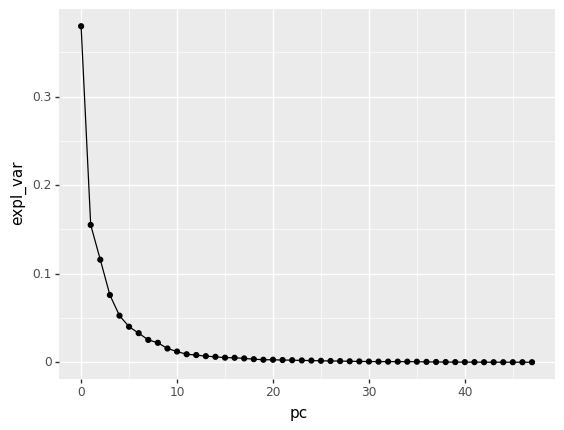

<ggplot: (8768900810584)>

In [225]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

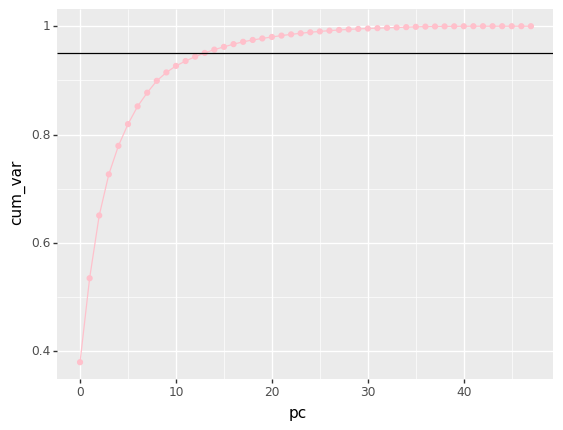

<ggplot: (8768900143695)>

In [226]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [242]:
# print(features)
predictors = features[1:]
print(predictors)
pcomps10 = pca.transform(subscriberDF[predictors])
pcomps10 = pd.DataFrame(pcomps10[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(subscriberDF[predictors], subscriberDF["Purchase Amount"])
print("all data: ", lr1.score(subscriberDF[predictors], subscriberDF["Purchase Amount"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(pcomps10, subscriberDF["Purchase Amount"])
print("10 PCs:   ", lr2.score(pcomps10, subscriberDF["Purchase Amount"]))


['Demo User', 'Free Trial User', 'Auto Renew', 'Email Subscriber', 'Push Notifications', 'Send Count', 'Open Count', 'Click Count', 'Unique Open Count', 'Unique Click Count', 'Language_ARA', 'Language_CHI', 'Language_DAR', 'Language_DEU', 'Language_EBR', 'Language_ENG', 'Language_ESC', 'Language_ESP', 'Language_FAR', 'Language_FRA', 'Language_GLE', 'Language_GRK', 'Language_HEB', 'Language_HIN', 'Language_IND', 'Language_ITA', 'Language_JPN', 'Language_KIS', 'Language_KOR', 'Language_LAT', 'Language_NED', 'Language_PAS', 'Language_POL', 'Language_POR', 'Language_RUS', 'Language_SVE', 'Language_TGL', 'Language_TUR', 'Language_URD', 'Language_VIE', 'Subscription Type_Lifetime', 'Subscription Event Type_RENEWAL', 'Purchase Store_App', 'Purchase Store_Web', 'User Type_Consumer', 'Lead Platform_App', 'Lead Platform_Web']


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Purchase Amount


In [232]:
loadings = pd.DataFrame({"loading": pca.components_.flatten(),
            "comp": np.repeat(range(0,len(pca.explained_variance_ratio_)),  len(pca.explained_variance_ratio_),
        axis=0), "variable":np.tile(features,len(pca.explained_variance_ratio_)) })

loadings.head(len(pca.explained_variance_ratio_)).sort_values(by = 'loading')

,loading,comp,variable
3,-3.602456e-02,0,Auto Renew
42,-1.962132e-02,0,Subscription Event Type_RENEWAL
18,-1.453376e-02,0,Language_ESP
43,-1.111869e-02,0,Purchase Store_App
20,-6.236164e-03,0,Language_FRA
16,-6.011272e-03,0,Language_ENG
17,-4.587372e-03,0,Language_ESC
14,-4.130041e-03,0,Language_DEU
26,-3.625546e-03,0,Language_ITA
15,-3.530033e-03,0,Language_EBR
